<a href="https://colab.research.google.com/github/gundaminpde/test1/blob/main/Openai_gym_rendering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## gym 버전 down-grade

!pip install gym==0.17.3
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654622 sha256=56463a2fb600bc5ac838245ff4084ce0ee77992d757ed348740f2e84528164fa
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


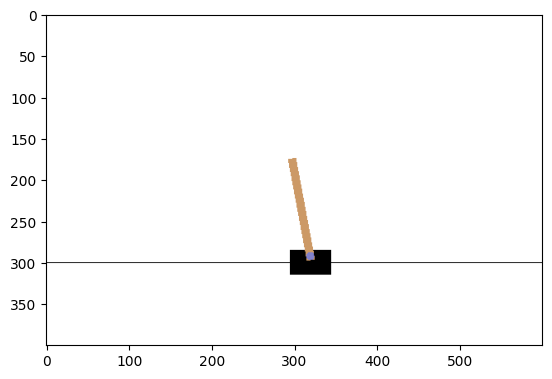

In [ ]:
import gym
from gym.wrappers.monitor import Monitor
import matplotlib.pyplot as plt
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay

### Colab에서 X Virtual Framebuffer (Xvfb)를 설정합니다. 이는 가상 디스플레이를 생성하는 데 사용됩니다.

display = Display(visible=0, size=(1400, 900))
display.start()

env = gym.make('CartPole-v1')
env = Monitor(env, './video', force=True)
env.reset()

for _ in range(1000):
    plt.imshow(env.render(mode='rgb_array'))
    ipythondisplay.display(plt.gcf())
    ipythondisplay.clear_output(wait=True)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        break

env.close()